In [1]:
import patchworklib as pw 

<Figure size 72x72 with 0 Axes>

## Patchworklib: patchwork for matplotlib
The patchworklib module provides the Brick class that is the subclass of matplotlib.axes.Axes.  
Each subclass object can be joined with other Brick class objects by using "|" or "/" operands.  
When creating a Brick class object, 'figsize' and 'label' property should be specified, and the 'label' value should be unique among the Brick class objects generated in a script.  
The 'figsize' of an object of the Brick class is not a fixed value. It may be changed in the process of aligning multiple graphs on a tidy layout.   
However, the aspect ratio of each Brick is basically preserved in the process.

For details, see the following example.

### 1. Arranging and stacking multiple axes objects with different aspect ratios

In [2]:
ax1 = pw.Brick("ax1",(1,1))
ax2 = pw.Brick("ax2",(1,3)) 
ax1.set_title("ax1")
ax2.set_title("ax2") 

Text(0.5, 1.0, 'ax2')

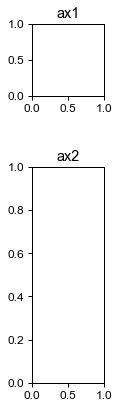

In [3]:
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 / ax2
ax12.savefig(fname=None, bbox_inches="tight")

In the above case, the widths of 'ax1' and ax2' are same. Therefore, their figure size has not been changed.

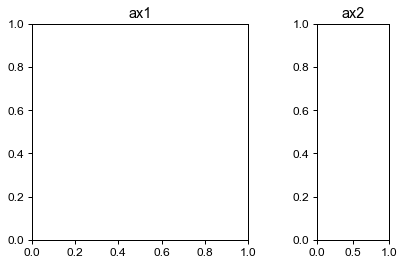

In [4]:
#arrange two Brick class objects with the vertical direction.
ax12 = ax1 | ax2
ax12.savefig(fname=None) #If 'fname' is Noen, it just return a figure object.  
ax12.savefig(fname=None)

In this case, the original height of 'ax2' is larger than ax1. Therefore, the size of 'ax1' has been automatically expanded to match ax2. 

The joined 'ax1' and 'ax2' is returned as Bricks class objects that holds multiple Brick class objects.  
Bricks class objects can also be joined with other Brick and Bricks class objects as follows.

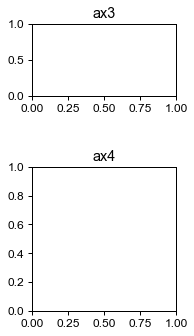

In [5]:
ax3 = pw.Brick("ax3",(2,1))
ax4 = pw.Brick("ax4",(2,2))
ax3.set_title("ax3")
ax4.set_title("ax4") 
ax34 = ax3/ax4
ax34.savefig(fname=None)

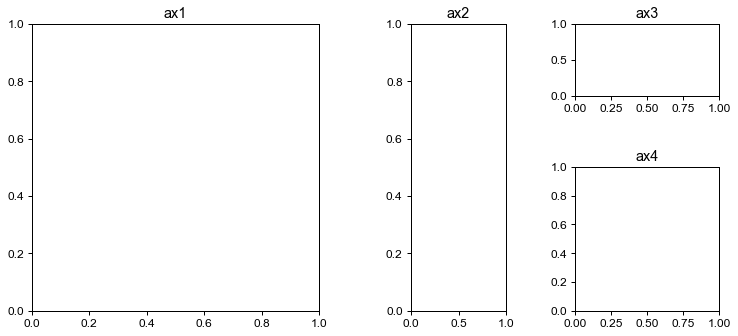

In [6]:
ax1234 = ax12 | ax34
ax1234.savefig(fname=None)

In [7]:
pw.clear()

### 2. Placing multiple seaborn plots with tidy layout
Seaborn provides functions for drawing attractive statistical graphics. However, they do not provide the function to arrange the multiple graphs generated using seaborn.
By using patchworklib, you can easily arrange seaborn plots the way you want.

In [8]:
import seaborn as sns
import numpy  as np
import pandas as pd

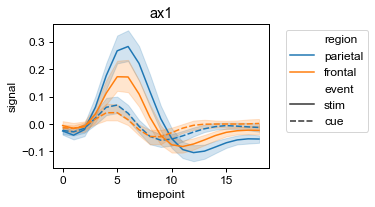

In [9]:
fmri = sns.load_dataset("fmri")
ax1 = pw.Brick("ax1", figsize=(3,2))
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri, ax=ax1)
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax1.set_title("ax1")
ax1.savefig() 

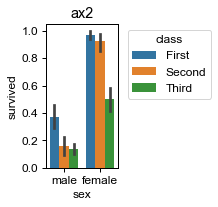

In [10]:
titanic = sns.load_dataset("titanic")
ax2 = pw.Brick("ax2", figsize=(1,2))
sns.barplot(x="sex", y="survived", hue="class", data=titanic, ax=ax2)
ax2.move_legend(new_loc='upper left', bbox_to_anchor=(1.05, 1.0))
ax2.set_title("ax2")
ax2.savefig("../img/ax2.png")

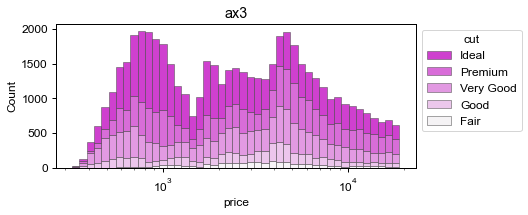

In [11]:
diamonds = sns.load_dataset("diamonds")
ax3 = pw.Brick("ax3", (5,2))
sns.histplot(diamonds, x="price", hue="cut", multiple="stack",
    palette="light:m_r", edgecolor=".3", linewidth=.5, log_scale=True,
    ax = ax3)
ax3.move_legend(new_loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax3.set_title("ax3")
ax3.savefig("../img/ax3.png")

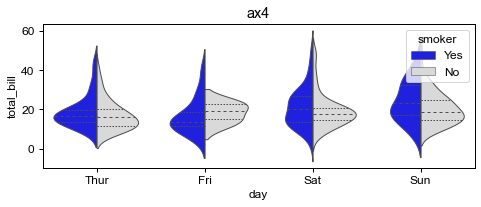

In [12]:
tips = sns.load_dataset("tips")
ax4 = pw.Brick("ax4", (6,2))
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
    split=True, inner="quart", linewidth=1,
    palette={"Yes": "b", "No": ".85"},
    ax=ax4)
ax4.set_title("ax4")
ax4.savefig("../img/ax4.png")

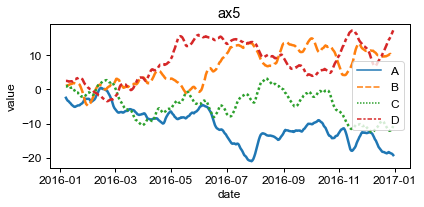

In [13]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
ax5 = pw.Brick("ax5", (5,2))
sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax5)
ax5.set_xlabel("date")
ax5.set_ylabel("value")
ax5.set_title("ax5")
ax5.savefig("../img/ax5.png")

**Let's align them**

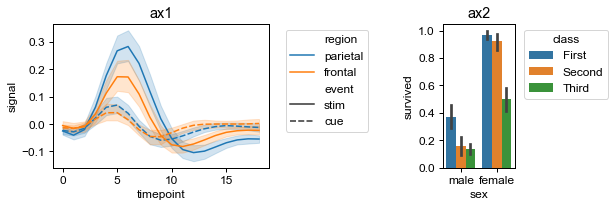

In [14]:
ax12 = ax1|ax2
ax12.savefig("../img/ax12.png")

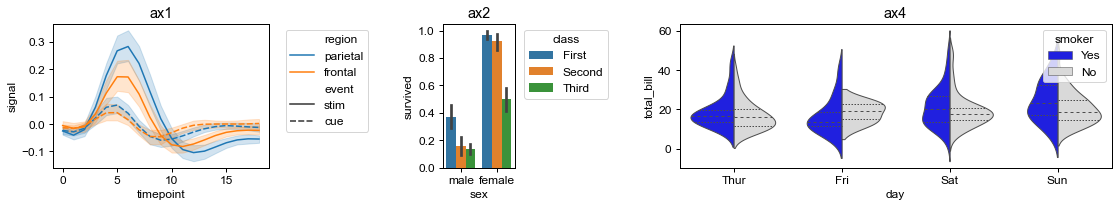

In [15]:
ax124 = (ax1|ax2)|ax4
ax124.savefig("../img/ax124.png")

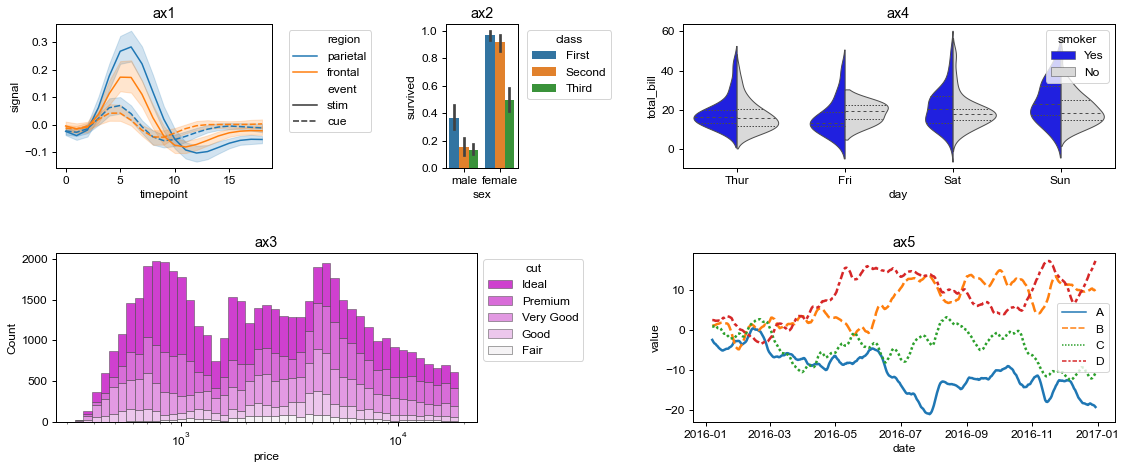

In [16]:
ax12435 = ax124/(ax3|ax5)
ax12435.savefig("../img/ax12435.png")

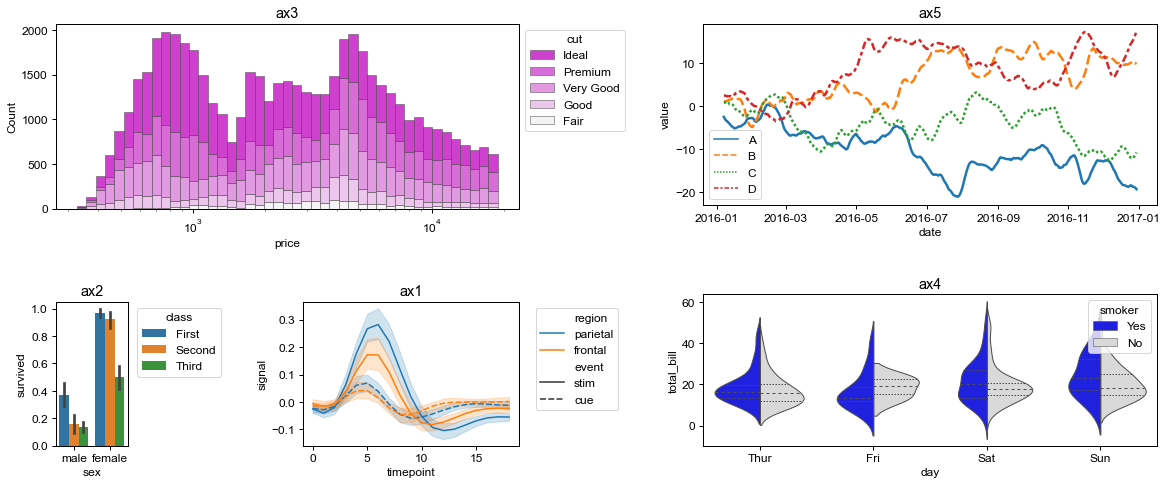

In [17]:
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig("../img/ax35214.png")

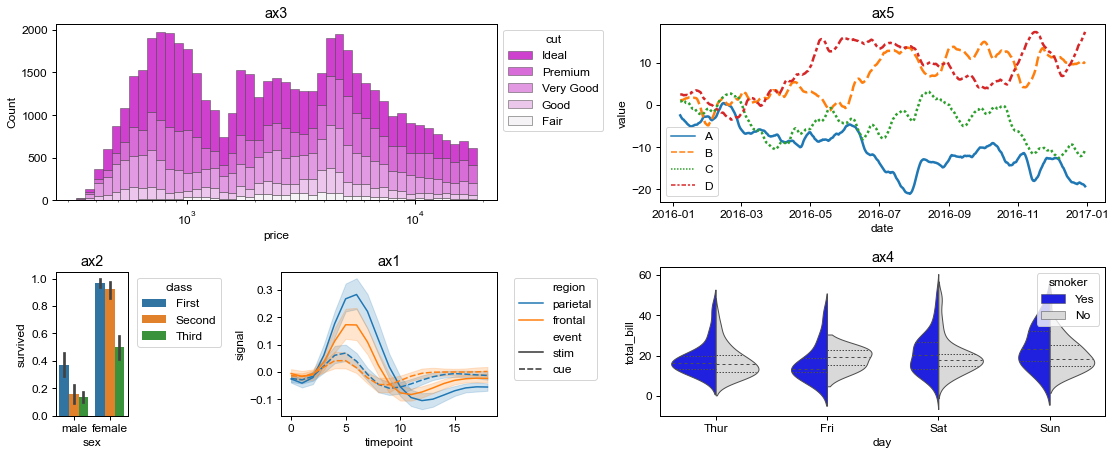

In [18]:
pw.param["margin"]=0.2 #Default value is 0.5.
ax35214 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214.savefig("../img/ax35214_v1.1.png")

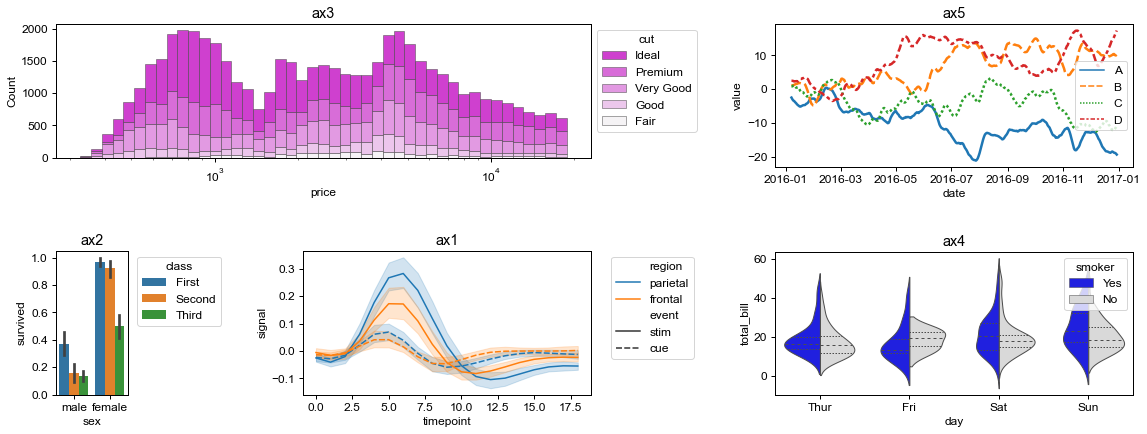

In [19]:
pw.param["margin"]=0.5
ax1.change_aspectratio((4,2))
ax3.change_aspectratio((4,1))
ax4.change_aspectratio((5,2))
ax35214_v2 = (ax3/(ax2|ax1))|(ax5/ax4)
ax35214_v2.savefig("../img/ax35214_v2.png")

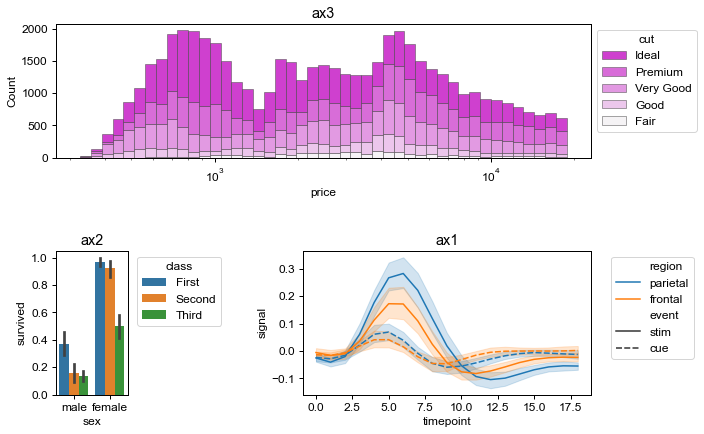

In [20]:
ax321 = ax3/(ax2|ax1)
ax321.savefig("../img/ax321.png")

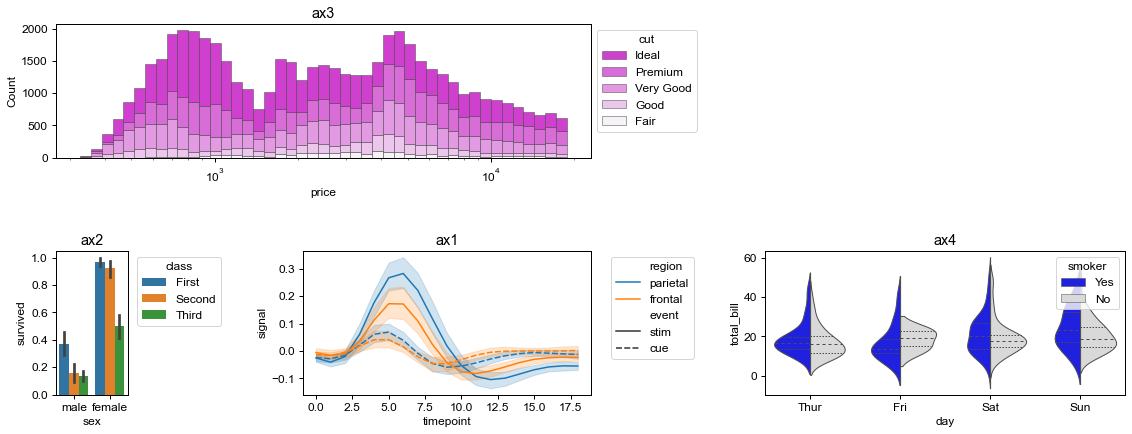

In [21]:
ax3214 = ax321["ax1"]|ax4
ax3214.savefig("../img/ax3214.png")

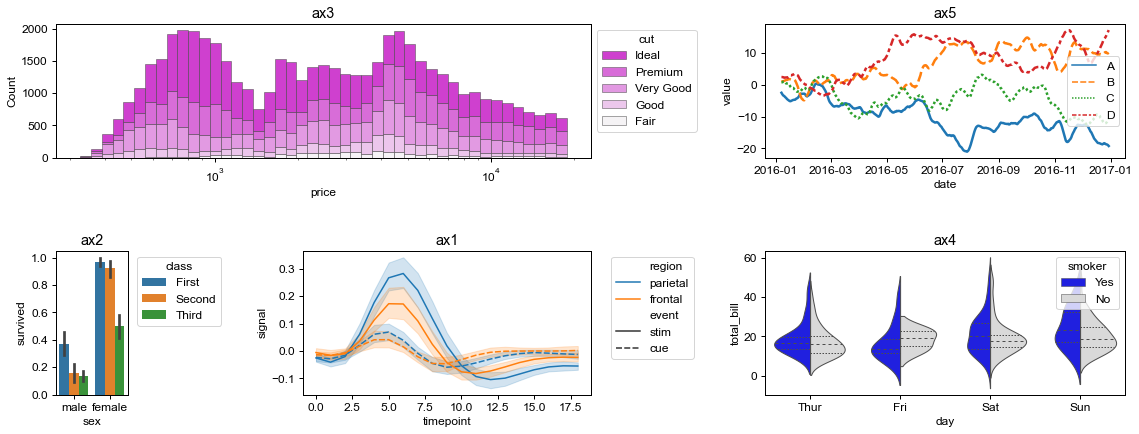

In [22]:
ax35214_v3 = ax3214["ax3"]|ax5
ax35214_v3.savefig("../img/ax35214_v3.png")

### 3: Arrange multiple plots with their outlines aligned (under inprementation).

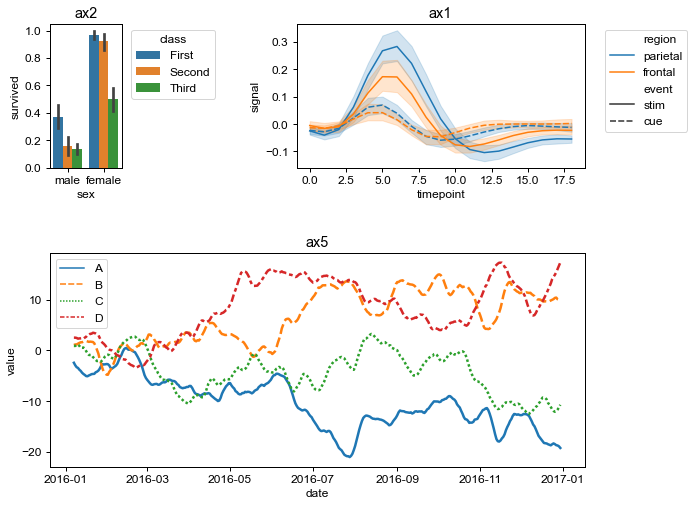

In [23]:
ax21  = ax2|ax1
ax215 = ax21/ax5
ax215.savefig("../img/ax215.png")

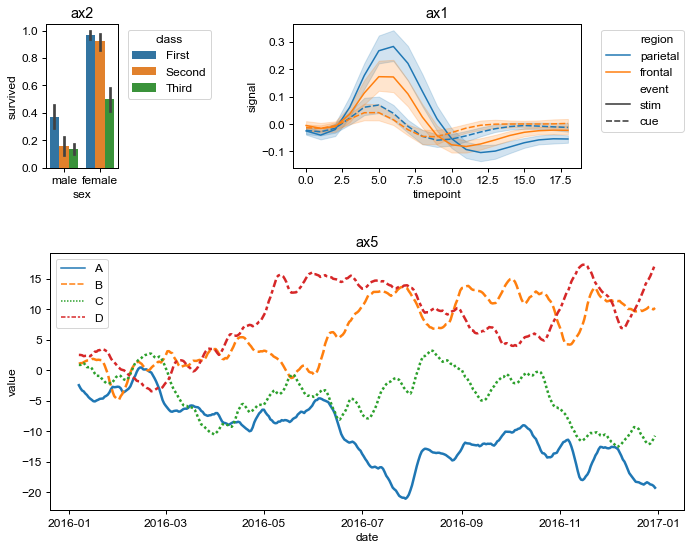

In [24]:
ax215 = ax21.outline/ax5.outline
ax215.savefig("../img/ax215_v2.png")

In [25]:
pw.clear()

### 4: Advanced usage: Joint plot

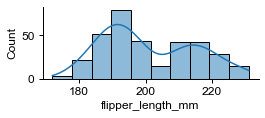

In [26]:
penguins = sns.load_dataset("penguins")
ax1 = pw.Brick("ax1", figsize=(3,1))
sns.histplot(data=penguins, x="flipper_length_mm", kde=True, ax=ax1)
ax1.spines["top"].set_visible(False) 
ax1.spines["right"].set_visible(False)
ax1.savefig()

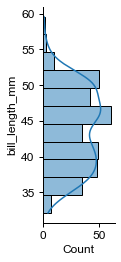

In [27]:
ax2 = pw.Brick("ax2", figsize=(1,3))
sns.histplot(data=penguins, y="bill_length_mm", kde=True, ax=ax2)
ax2.spines["top"].set_visible(False) 
ax2.spines["right"].set_visible(False)
ax2.savefig()

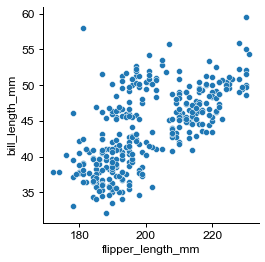

In [28]:
ax3 = pw.Brick("ax3", figsize=(3,3))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", ax=ax3)
ax3.spines["top"].set_visible(False) 
ax3.spines["right"].set_visible(False)
ax3.savefig()

In [29]:
ax1.set_xlim(ax3.get_xlim())
ax1.set_xticks([])
ax1.set_xlabel("") 

ax2.set_ylim(ax3.get_ylim())
ax2.set_yticks([])
ax2.set_ylabel("")

Text(-25.5, 0.5, '')

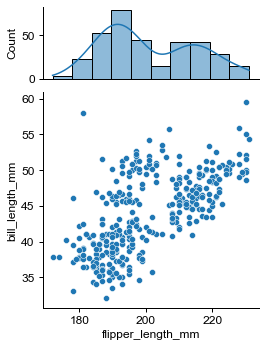

In [30]:
pw.param["margin"] = 0.1 #default value is 0.4
ax13 = ax1 / ax3
ax13.savefig()

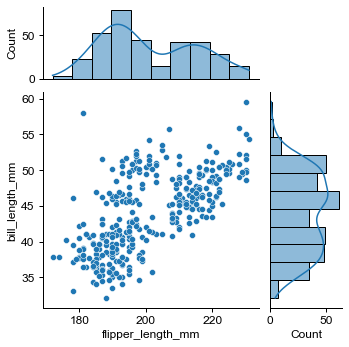

In [31]:
ax132 = ax13["ax3"] | ax2
ax132.savefig()

Off course, you can align multiple joint plots

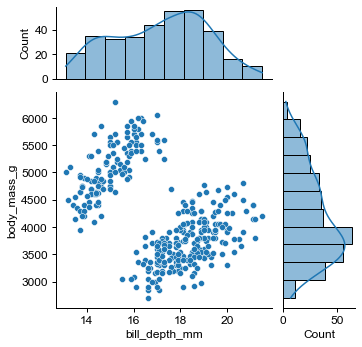

In [32]:
ax4 = pw.Brick("ax4", figsize=(3,1))
sns.histplot(data=penguins, x="bill_depth_mm", kde=True, ax=ax4)
ax4.spines["top"].set_visible(False) 
ax4.spines["right"].set_visible(False)

ax5 = pw.Brick("ax5", figsize=(1,3))
sns.histplot(data=penguins, y="body_mass_g", kde=True, ax=ax5)
ax5.spines["top"].set_visible(False) 
ax5.spines["right"].set_visible(False)
ax5.savefig()

ax6 = pw.Brick("ax6", figsize=(3,3))
sns.scatterplot(data=penguins, x="bill_depth_mm", y="body_mass_g", ax=ax6)
ax6.spines["top"].set_visible(False) 
ax6.spines["right"].set_visible(False)
ax6.savefig()

ax4.set_xlim(ax4.get_xlim())
ax4.set_xticks([])
ax4.set_xlabel("") 

ax5.set_ylim(ax5.get_ylim())
ax5.set_yticks([])
ax5.set_ylabel("")

ax46 = ax4 / ax6
ax465 = ax46["ax6"] | ax5
ax465.savefig()

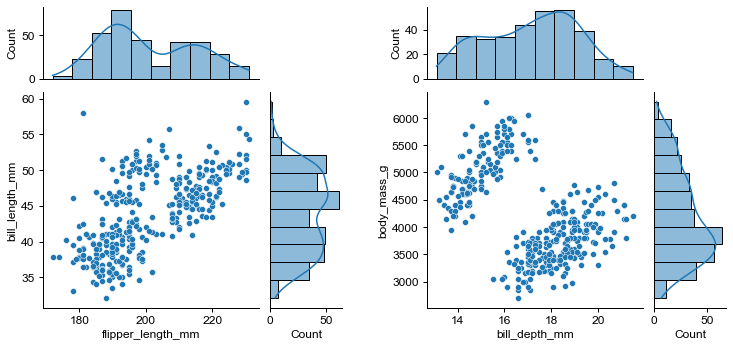

In [33]:
pw.param["margin"] = 0.5
ax132465 = ax132 | ax465
ax132465.savefig()

In [34]:
pw.clear()

### 5: Heatmap with colorbar
When creating heatmap pltos using patchworklib, I recommand to create heatmap and color bar objects separately, as follows.

In [35]:
import matplotlib as mpl
data1 = 20 * np.random.rand(100,100) - 10
data2 = 20 * np.random.rand(100,100) - 10

cmap = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin=-10, vmax=10)
ax1 = pw.Brick("axx", figsize=(3,3))
ax2 = pw.Brick("axy", figsize=(3,3))
ax1.imshow(data1, interpolation='nearest', cmap=cmap, aspect="auto")
ax2.imshow(data2, interpolation='nearest', cmap=cmap, aspect="auto")

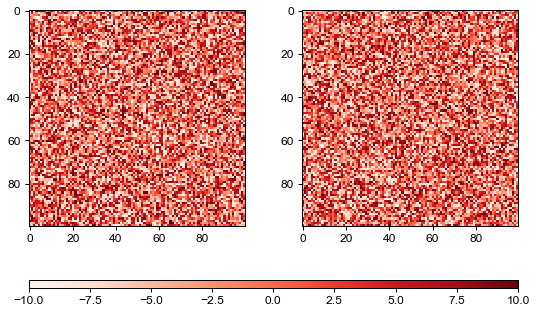

In [36]:
ax_cb1 = pw.Brick("ax_cb1", figsize=(6, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = (ax1|ax2)
heatmap1 = heatmap1/ax_cb1
heatmap1.savefig()

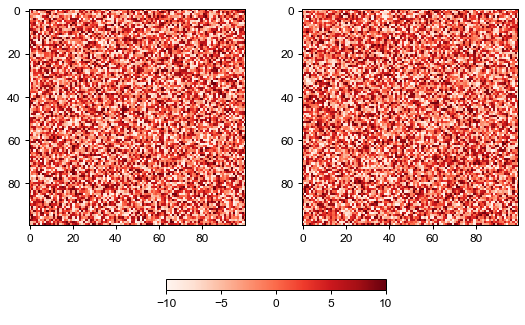

In [37]:
ax_cb1_2 = pw.Brick("ax_cb1_2", figsize=(2, 0.1))
cb1 = mpl.colorbar.ColorbarBase(ax_cb1_2, cmap=cmap, norm=norm, orientation='horizontal')
heatmap1 = ax1|ax2
heatmap1 = heatmap1/(pw.spacer(ax_cb1_2,0.5)|ax_cb1_2|pw.spacer(ax_cb1_2,0.5))
heatmap1.savefig()

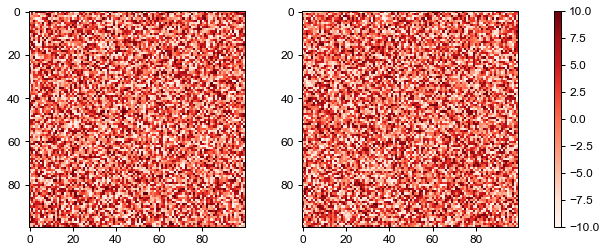

In [38]:
ax_cb    = pw.Brick("ax_cb", figsize=(0.1,3))
cb       = mpl.colorbar.ColorbarBase(ax_cb, cmap=cmap, norm=norm)
ax12     = ax1|ax2
heatmap2 = ax12|ax_cb
heatmap2.savefig("../img/heatmap-1.png")

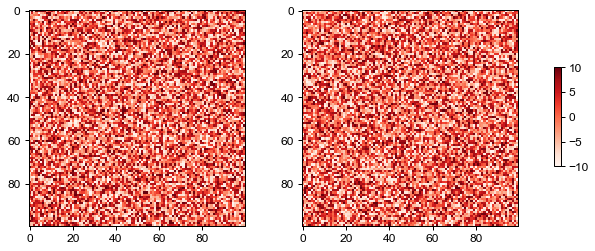

In [39]:
ax_cb2   = pw.Brick("ax_cb2", figsize=(0.1,1.5))
cb2      = mpl.colorbar.ColorbarBase(ax_cb2, cmap=cmap, norm=norm)
heatmap2 = ax12 | (pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig()

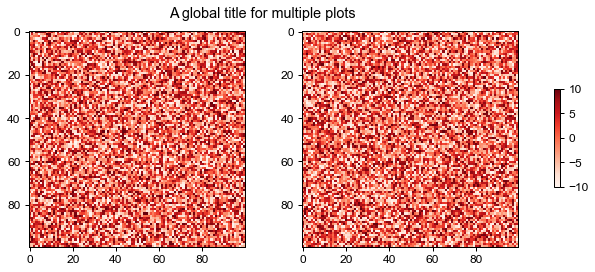

In [40]:
ax12.case.set_title("A global title for multiple plots", pad=10)
heatmap2 = ax12|(pw.spacer(ax_cb2,0.5)/ax_cb2/pw.spacer(ax_cb2,0.5))
heatmap2.savefig()